In [ ]:
import pandas as pd

train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
sample_submission_df=pd.read_csv('sample_submission.csv')

In [ ]:
train_df.drop('Name',axis=1,inplace=True)
test_df.drop('Name',axis=1,inplace=True)

In [ ]:
def remove_outlier(df, col_names):
    df_in=df.copy()
    for col_name in col_names:
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_in = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_in

In [ ]:
train_df.loc[(train_df['Age']>10) & (train_df['Age']<30)]

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
6        0006_01      Earth     False     F/2/S    TRAPPIST-1e  26.0  False   
9        0008_01     Europa      True     B/1/P    55 Cancri e  14.0  False   
14       0011_01      Earth     False     F/2/P    TRAPPIST-1e  28.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8679     9267_02     Europa      True   E/607/S    TRAPPIST-1e  20.0  False   
8682     9272_01      Earth     False  G/1507/P    TRAPPIST-1e  26.0  False   
8683     9272_02      Earth     False  F/1894/P    TRAPPIST-1e  21.0  False   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck  Transported  
1           109.0        9.0          25.0  549.0    44.0         True  
4           303.0       70.0         151.0  565.0     2.0         True  
6            42.0     1539.0           3.0    0.0     0.0         True  
9             0.0        0.0           0.0    0.0     0.0         True  
14            8.0      974.0          12.0    2.0     7.0         True  
...           ...        ...           ...    ...     ...          ...  
8679          0.0        0.0           0.0    0.0     0.0         True  
8682        240.0      242.0         510.0    0.0     0.0         True  
8683         86.0        3.0         149.0  208.0   329.0        False  
8689          0.0        0.0           0.0    0.0     0.0        False  
8690          0.0        0.0        1872.0    1.0     0.0         True  

[3239 rows x 13 columns]

In [ ]:
train_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0          0.0        0.0           0.0     0.0     0.0        False  
1        109.0        9.0          25.0   549.0    44.0         True  
2         43.0     3576.0           0.0  6715.0    49.0        False  
3          0.0     1283.0         371.0  3329.0   193.0        False  
4        303.0       70.0         151.0   565.0     2.0         True

In [ ]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [ ]:
test_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  
0          0.0        0.0           0.0     0.0     0.0  
1          0.0        9.0           0.0  2823.0     0.0  
2          0.0        0.0           0.0     0.0     0.0  
3          0.0     6652.0           0.0   181.0   585.0  
4         10.0        0.0         635.0     0.0     0.0

In [ ]:
train_df.describe()

Age  RoomService     FoodCourt  ShoppingMall           Spa  \
count  6606.000000  6606.000000   6606.000000   6606.000000   6606.000000   
mean     28.894036   222.991674    478.958523    178.356494    313.161520   
std      14.533429   644.987936   1678.592291    576.328407   1144.016291   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%      19.000000     0.000000      0.000000      0.000000      0.000000   
50%      27.000000     0.000000      0.000000      0.000000      0.000000   
75%      38.000000    49.000000     82.750000     30.000000     65.000000   
max      79.000000  9920.000000  29813.000000  12253.000000  22408.000000   

             VRDeck  
count   6606.000000  
mean     303.780048  
std     1127.142166  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       52.000000  
max    20336.000000

In [ ]:
train_df.shape,test_df.shape

((6606, 13), (4277, 12))

In [ ]:
num_cols=[col for col in train_df.columns if str(train_df[col].dtype)=='int64' or str(train_df[col].dtype)=='float64']
cat_cols=[col for col in train_df.columns if col not in num_cols]
id_col='PassengerId'
cat_cols.remove(id_col)

In [ ]:
#train_df=remove_outlier(train_df,['FoodCourt'])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 677.4+ KB


<AxesSubplot:>

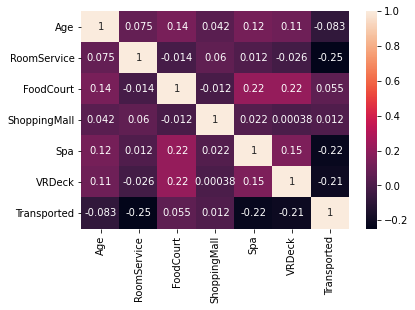

In [ ]:
import seaborn as sns
sns.heatmap(train_df.corr(),annot=True)

In [ ]:
train_df.dropna(inplace=True)

In [ ]:
#nan value for numeric cols
#drop_num_col=[col for col in num_cols if train_df[col].isna().sum()>0.5*len(train_df)]
#keep_num_col=[col for col in num_cols if col not in drop_num_col]
#for i in keep_num_col:
#    train_df[i].fillna(train_df[i].mean(),inplace=True)
#train_df.drop(drop_num_col,axis=1,inplace=True)

#nan value for categorical cols
drop_cat_cols=[col for col in cat_cols if train_df[col].isna().sum()>0.5*len(train_df)]
keep_cat_col=[col for col in cat_cols if col not in drop_cat_cols]
for i in keep_cat_col:
    train_df[i].fillna(train_df[i].mode()[0],inplace=True)
train_df.drop(drop_cat_cols,axis=1,inplace=True)

In [ ]:
train_df.shape

(6606, 13)

In [ ]:
train_df.dropna(inplace=True)

In [ ]:
train_df.drop(id_col,axis=1,inplace=True)

In [ ]:
X=train_df.drop('Transported',axis=1)
y=train_df.Transported
cat_cols.remove('Transported')

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
X_train_o=ohe.fit_transform(X_train)
X_train_o.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_preds_test_rfc=rfc.predict(X_test)
print(accuracy_score(y_test,y_preds_test_rfc))

ValueError: could not convert string to float: 'Mars'

In [ ]:
from catboost import CatBoostClassifier
cbc=CatBoostClassifier()
cbc.fit(X_train,y_train,cat_features=cat_cols,plot=True,eval_set=(X_test,y_test),early_stopping_rounds=100,use_best_model=True)
y_preds_test_cbc=cbc.predict(X_test)
y_test_lis=list(map(str,y_test))
print(accuracy_score(y_test_lis,y_preds_test_cbc))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.046256
0:	learn: 0.6697550	test: 0.6707107	best: 0.6707107 (0)	total: 66.2ms	remaining: 1m 6s
1:	learn: 0.6525578	test: 0.6547219	best: 0.6547219 (1)	total: 150ms	remaining: 1m 15s
2:	learn: 0.6342125	test: 0.6370195	best: 0.6370195 (2)	total: 230ms	remaining: 1m 16s
3:	learn: 0.6186797	test: 0.6219447	best: 0.6219447 (3)	total: 307ms	remaining: 1m 16s
4:	learn: 0.6019426	test: 0.6063570	best: 0.6063570 (4)	total: 396ms	remaining: 1m 18s
5:	learn: 0.5867441	test: 0.5911948	best: 0.5911948 (5)	total: 472ms	remaining: 1m 18s
6:	learn: 0.5732691	test: 0.5785471	best: 0.5785471 (6)	total: 548ms	remaining: 1m 17s
7:	learn: 0.5640139	test: 0.5694431	best: 0.5694431 (7)	total: 590ms	remaining: 1m 13s
8:	learn: 0.5542188	test: 0.5599287	best: 0.5599287 (8)	total: 620ms	remaining: 1m 8s
9:	learn: 0.5450653	test: 0.5507143	best: 0.5507143 (9)	total: 650ms	remaining: 1m 4s
10:	learn: 0.5379583	test: 0.5442879	best: 0.5442879 (10)	total: 679ms	remaining: 1m 1s
11:	learn: 0.5

97:	learn: 0.4114155	test: 0.4368726	best: 0.4368726 (97)	total: 3.1s	remaining: 28.5s
98:	learn: 0.4112578	test: 0.4367649	best: 0.4367649 (98)	total: 3.13s	remaining: 28.5s
99:	learn: 0.4110814	test: 0.4368681	best: 0.4367649 (98)	total: 3.16s	remaining: 28.4s
100:	learn: 0.4105904	test: 0.4366962	best: 0.4366962 (100)	total: 3.19s	remaining: 28.4s
101:	learn: 0.4105003	test: 0.4366131	best: 0.4366131 (101)	total: 3.21s	remaining: 28.3s
102:	learn: 0.4099060	test: 0.4363495	best: 0.4363495 (102)	total: 3.24s	remaining: 28.2s
103:	learn: 0.4097258	test: 0.4362107	best: 0.4362107 (103)	total: 3.27s	remaining: 28.2s
104:	learn: 0.4093550	test: 0.4361272	best: 0.4361272 (104)	total: 3.3s	remaining: 28.1s
105:	learn: 0.4092414	test: 0.4361087	best: 0.4361087 (105)	total: 3.33s	remaining: 28.1s
106:	learn: 0.4091459	test: 0.4360215	best: 0.4360215 (106)	total: 3.35s	remaining: 28s
107:	learn: 0.4089092	test: 0.4360584	best: 0.4360215 (106)	total: 3.38s	remaining: 27.9s
108:	learn: 0.408529

195:	learn: 0.3909903	test: 0.4317883	best: 0.4316745 (194)	total: 5.93s	remaining: 24.3s
196:	learn: 0.3908688	test: 0.4317886	best: 0.4316745 (194)	total: 5.96s	remaining: 24.3s
197:	learn: 0.3907456	test: 0.4317669	best: 0.4316745 (194)	total: 5.99s	remaining: 24.3s
198:	learn: 0.3905915	test: 0.4318446	best: 0.4316745 (194)	total: 6.02s	remaining: 24.2s
199:	learn: 0.3904159	test: 0.4317732	best: 0.4316745 (194)	total: 6.06s	remaining: 24.2s
200:	learn: 0.3902014	test: 0.4317447	best: 0.4316745 (194)	total: 6.09s	remaining: 24.2s
201:	learn: 0.3898173	test: 0.4316486	best: 0.4316486 (201)	total: 6.12s	remaining: 24.2s
202:	learn: 0.3894993	test: 0.4316261	best: 0.4316261 (202)	total: 6.16s	remaining: 24.2s
203:	learn: 0.3892782	test: 0.4316556	best: 0.4316261 (202)	total: 6.18s	remaining: 24.1s
204:	learn: 0.3890101	test: 0.4317532	best: 0.4316261 (202)	total: 6.21s	remaining: 24.1s
205:	learn: 0.3886537	test: 0.4317066	best: 0.4316261 (202)	total: 6.24s	remaining: 24.1s
206:	learn

290:	learn: 0.3688436	test: 0.4310044	best: 0.4309303 (271)	total: 9.5s	remaining: 23.2s
291:	learn: 0.3686014	test: 0.4309497	best: 0.4309303 (271)	total: 9.54s	remaining: 23.1s
292:	learn: 0.3681694	test: 0.4312275	best: 0.4309303 (271)	total: 9.56s	remaining: 23.1s
293:	learn: 0.3678397	test: 0.4311916	best: 0.4309303 (271)	total: 9.59s	remaining: 23s
294:	learn: 0.3676993	test: 0.4311800	best: 0.4309303 (271)	total: 9.62s	remaining: 23s
295:	learn: 0.3674563	test: 0.4312898	best: 0.4309303 (271)	total: 9.64s	remaining: 22.9s
296:	learn: 0.3672701	test: 0.4313044	best: 0.4309303 (271)	total: 9.67s	remaining: 22.9s
297:	learn: 0.3668663	test: 0.4314387	best: 0.4309303 (271)	total: 9.7s	remaining: 22.8s
298:	learn: 0.3666166	test: 0.4314456	best: 0.4309303 (271)	total: 9.73s	remaining: 22.8s
299:	learn: 0.3663834	test: 0.4314818	best: 0.4309303 (271)	total: 9.76s	remaining: 22.8s
300:	learn: 0.3661594	test: 0.4315548	best: 0.4309303 (271)	total: 9.79s	remaining: 22.7s
301:	learn: 0.36

In [ ]:
y_test_lis=list(map(str,y_test))
print(accuracy_score(y_test_lis,y_preds_test_cbc))

0.7885973763874874


In [ ]:
keep_cat_col

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Transported']

In [ ]:
keep_cat_col.remove('Transported')

In [ ]:
for i in keep_cat_col:
    test_df[i].fillna(test_df[i].mode()[0],inplace=True)

In [ ]:
test_df

PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth       True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth      False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa       True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa      False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth      False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
4272     9266_02      Earth       True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth      False   G/160/P    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars       True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa      False   D/297/P    TRAPPIST-1e   NaN  False   
4276     9277_01      Earth       True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  
0             0.0        0.0           0.0     0.0     0.0  
1             0.0        9.0           0.0  2823.0     0.0  
2             0.0        0.0           0.0     0.0     0.0  
3             0.0     6652.0           0.0   181.0   585.0  
4            10.0        0.0         635.0     0.0     0.0  
...           ...        ...           ...     ...     ...  
4272          0.0        0.0           0.0     0.0     0.0  
4273          0.0      847.0          17.0    10.0   144.0  
4274          0.0        0.0           0.0     0.0     0.0  
4275          0.0     2680.0           0.0     0.0   523.0  
4276          0.0        0.0           0.0     0.0     0.0  

[4277 rows x 12 columns]

In [ ]:
test_df.drop(id_col,axis=1,inplace=True)
X_test_f=test_df
preds_test_final=cbc.predict(X_test_f)

In [ ]:
preds_test_final

array(['True', 'False', 'True', ..., 'True', 'True', 'True'], dtype=object)

In [ ]:
sample_submission_df.head()

PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01        False
3     0021_01        False
4     0023_01        False

In [ ]:
sample_submission_df.Transported=preds_test_final

In [ ]:
sample_submission_df.head()

PassengerId Transported
0     0013_01        True
1     0018_01       False
2     0019_01        True
3     0021_01        True
4     0023_01        True

In [ ]:
sample_submission_df.to_csv('Submission2.csv',index=False)